<a href='http://moncoachdata.com'><img src= 'https://moncoachdata.com/wp-content/uploads/MonCoachData-cours/MonCoachData.jpg' width=400/></a>


---


<center><em>Copyright MonCoachData (tous droits réservés)</em></center>
<center><em>Pour plus d'informations, visitez notre site <a href='http://moncoachdata.com'>moncoachdata.com</a></em></center>



---

# DÉPLOIEMENT

**Bienvenue dans la section sur le déploiement ! Dans cette section du cours, nous allons passer en revue l'ensemble du processus de déploiement, en commençant comme si vous deviez créer un modèle fonctionnel à partir de zéro, puis le déployer pour que d'autres utilisateurs puissent l'utiliser, soit via une API soit via un formulaire Web.**

# Données

Pour cet exemple, nous utilisons l'ensemble de données très commun : [jeu de données Iris](https://fr.wikipedia.org/wiki/Iris_de_Fisher), qui est sur les fleurs. 

Wikipedia:
Le jeu de données Iris connu aussi sous le nom de Iris de Fisher est un jeu de données multivariées présenté en 1936 par Ronald Fisher dans son papier "The use of multiple measurements in taxonomic problems" comme un exemple d'application de l'analyse discriminante linéaire. Il est parfois aussi appelé Iris d'Anderson du nom d'Edgar Anderson qui a collecté ces données afin de quantifier les variations de morphologie des fleurs d'iris de trois espèces. Deux des trois espèces ont été collectées en Gaspésie. Toutes sont du même champ, cueillies le même jour et mesurées le même jour par la même personne avec les mêmes outils de mesures.

Le jeu de données comprend 50 échantillons de chacune des trois espèces d'iris (Iris setosa, Iris virginica et Iris versicolor).  Quatre caractéristiques ont été mesurées à partir de chaque échantillon : la longueur et la largeur des sépales et des pétales, en centimètres.

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
iris = pd.read_csv("iris.csv")

In [ ]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Data Processing (Traitement des données)

### Features et Target

In [ ]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [ ]:
X = iris.drop('species',axis=1)
y = iris['species']

In [ ]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [ ]:
# Beaucoup de façons d'encoder en one-hot :
# https://stackoverflow.com/questions/47573293/unable-to-transform-string-column-to-categorical-matrix-using-keras-and-sklearn
# https://stackoverflow.com/questions/35107559/one-hot-encoding-of-string-categorical-features

In [ ]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
y = encoder.fit_transform(y)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

### Scaling (mise à l'échelle)

In [ ]:
scaler = MinMaxScaler()

In [ ]:
scaler.fit(X_train)

MinMaxScaler()

In [ ]:
scaled_X_train = scaler.transform(X_train)

In [ ]:
scaled_X_test = scaler.transform(X_test)

## Modèle


### Création du Modèle

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential()
model.add(Dense(units=4,activation='relu',input_shape=[4,]))

# Dernière couche pour la classification multi-classes de 3 espèces
model.add(Dense(units=3,activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',metrics=['accuracy'])

## Entraînement du Modèle

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(patience=10)

In [ ]:
model.fit(x=scaled_X_train, 
          y=y_train, 
          epochs=300,
          validation_data=(scaled_X_test, y_test), verbose=1 ,callbacks=[early_stop]         )

Train on 120 samples, validate on 30 samples
Epoch 1/300
120/120 [==============================] - 1s 8ms/sample - loss: 1.1203 - accuracy: 0.3167 - val_loss: 1.1061 - val_accuracy: 0.4000
Epoch 2/300
120/120 [==============================] - 0s 508us/sample - loss: 1.1176 - accuracy: 0.3167 - val_loss: 1.1038 - val_accuracy: 0.4000
Epoch 3/300
120/120 [==============================] - 0s 509us/sample - loss: 1.1151 - accuracy: 0.3167 - val_loss: 1.1013 - val_accuracy: 0.4000
Epoch 4/300
120/120 [==============================] - 0s 457us/sample - loss: 1.1127 - accuracy: 0.3167 - val_loss: 1.0988 - val_accuracy: 0.4000
Epoch 5/300
120/120 [==============================] - 0s 549us/sample - loss: 1.1101 - accuracy: 0.3167 - val_loss: 1.0965 - val_accuracy: 0.4333
Epoch 6/300
120/120 [==============================] - 0s 549us/sample - loss: 1.1075 - accuracy: 0.3167 - val_loss: 1.0940 - val_accuracy: 0.4333
Epoch 7/300
120/120 [==============================] - 0s 494us/sample - lo

120/120 [==============================] - 0s 509us/sample - loss: 0.9554 - accuracy: 0.6500 - val_loss: 0.9409 - val_accuracy: 0.7333
Epoch 57/300
120/120 [==============================] - 0s 547us/sample - loss: 0.9522 - accuracy: 0.6500 - val_loss: 0.9380 - val_accuracy: 0.7333
Epoch 58/300
120/120 [==============================] - 0s 475us/sample - loss: 0.9490 - accuracy: 0.6500 - val_loss: 0.9351 - val_accuracy: 0.7333
Epoch 59/300
120/120 [==============================] - 0s 483us/sample - loss: 0.9458 - accuracy: 0.6500 - val_loss: 0.9321 - val_accuracy: 0.7333
Epoch 60/300
120/120 [==============================] - 0s 514us/sample - loss: 0.9426 - accuracy: 0.6500 - val_loss: 0.9290 - val_accuracy: 0.7333
Epoch 61/300
120/120 [==============================] - 0s 462us/sample - loss: 0.9393 - accuracy: 0.6500 - val_loss: 0.9261 - val_accuracy: 0.7333
Epoch 62/300
120/120 [==============================] - 0s 489us/sample - loss: 0.9361 - accuracy: 0.6500 - val_loss: 0.9230 

120/120 [==============================] - 0s 558us/sample - loss: 0.7631 - accuracy: 0.5917 - val_loss: 0.7724 - val_accuracy: 0.6333
Epoch 112/300
120/120 [==============================] - 0s 523us/sample - loss: 0.7595 - accuracy: 0.5917 - val_loss: 0.7694 - val_accuracy: 0.6333
Epoch 113/300
120/120 [==============================] - 0s 486us/sample - loss: 0.7560 - accuracy: 0.5917 - val_loss: 0.7665 - val_accuracy: 0.6333
Epoch 114/300
120/120 [==============================] - 0s 477us/sample - loss: 0.7530 - accuracy: 0.5917 - val_loss: 0.7638 - val_accuracy: 0.6333
Epoch 115/300
120/120 [==============================] - 0s 478us/sample - loss: 0.7491 - accuracy: 0.5917 - val_loss: 0.7607 - val_accuracy: 0.6333
Epoch 116/300
120/120 [==============================] - 0s 501us/sample - loss: 0.7457 - accuracy: 0.5917 - val_loss: 0.7577 - val_accuracy: 0.6333
Epoch 117/300
120/120 [==============================] - 0s 494us/sample - loss: 0.7423 - accuracy: 0.5833 - val_loss: 0

120/120 [==============================] - 0s 555us/sample - loss: 0.6062 - accuracy: 0.6833 - val_loss: 0.6413 - val_accuracy: 0.6000
Epoch 167/300
120/120 [==============================] - 0s 555us/sample - loss: 0.6041 - accuracy: 0.6833 - val_loss: 0.6395 - val_accuracy: 0.6000
Epoch 168/300
120/120 [==============================] - 0s 690us/sample - loss: 0.6020 - accuracy: 0.6833 - val_loss: 0.6377 - val_accuracy: 0.6000
Epoch 169/300
120/120 [==============================] - 0s 560us/sample - loss: 0.5999 - accuracy: 0.6833 - val_loss: 0.6360 - val_accuracy: 0.6000
Epoch 170/300
120/120 [==============================] - 0s 523us/sample - loss: 0.5980 - accuracy: 0.6833 - val_loss: 0.6344 - val_accuracy: 0.6000
Epoch 171/300
120/120 [==============================] - 0s 617us/sample - loss: 0.5959 - accuracy: 0.6833 - val_loss: 0.6328 - val_accuracy: 0.6000
Epoch 172/300
120/120 [==============================] - 0s 646us/sample - loss: 0.5940 - accuracy: 0.6833 - val_loss: 0

120/120 [==============================] - 0s 638us/sample - loss: 0.5217 - accuracy: 0.6833 - val_loss: 0.5634 - val_accuracy: 0.6000
Epoch 222/300
120/120 [==============================] - 0s 435us/sample - loss: 0.5206 - accuracy: 0.6833 - val_loss: 0.5622 - val_accuracy: 0.6000
Epoch 223/300
120/120 [==============================] - 0s 402us/sample - loss: 0.5195 - accuracy: 0.6833 - val_loss: 0.5613 - val_accuracy: 0.6000
Epoch 224/300
120/120 [==============================] - 0s 397us/sample - loss: 0.5185 - accuracy: 0.6833 - val_loss: 0.5604 - val_accuracy: 0.6000
Epoch 225/300
120/120 [==============================] - 0s 391us/sample - loss: 0.5174 - accuracy: 0.6833 - val_loss: 0.5593 - val_accuracy: 0.6000
Epoch 226/300
120/120 [==============================] - 0s 429us/sample - loss: 0.5164 - accuracy: 0.6833 - val_loss: 0.5582 - val_accuracy: 0.6000
Epoch 227/300
120/120 [==============================] - 0s 409us/sample - loss: 0.5153 - accuracy: 0.6833 - val_loss: 0

120/120 [==============================] - 0s 489us/sample - loss: 0.4528 - accuracy: 0.7750 - val_loss: 0.4891 - val_accuracy: 0.7667
Epoch 277/300
120/120 [==============================] - 0s 464us/sample - loss: 0.4517 - accuracy: 0.7833 - val_loss: 0.4880 - val_accuracy: 0.7667
Epoch 278/300
120/120 [==============================] - 0s 521us/sample - loss: 0.4505 - accuracy: 0.7917 - val_loss: 0.4868 - val_accuracy: 0.7667
Epoch 279/300
120/120 [==============================] - 0s 499us/sample - loss: 0.4493 - accuracy: 0.7917 - val_loss: 0.4858 - val_accuracy: 0.7667
Epoch 280/300
120/120 [==============================] - 0s 478us/sample - loss: 0.4482 - accuracy: 0.8000 - val_loss: 0.4849 - val_accuracy: 0.7667
Epoch 281/300
120/120 [==============================] - 0s 483us/sample - loss: 0.4471 - accuracy: 0.8000 - val_loss: 0.4841 - val_accuracy: 0.7667
Epoch 282/300
120/120 [==============================] - 0s 479us/sample - loss: 0.4460 - accuracy: 0.8000 - val_loss: 0

## Évaluation du Modèle

In [ ]:
metrics = pd.DataFrame(model.history.history)

In [ ]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,1.120268,0.316667,1.106057,0.400000
1,1.117569,0.316667,1.103778,0.400000
2,1.115141,0.316667,1.101264,0.400000
3,1.112662,0.316667,1.098836,0.400000
4,1.110052,0.316667,1.096464,0.433333
...,...,...,...,...
295,0.431077,0.808333,0.470851,0.800000
296,0.429924,0.808333,0.470163,0.800000
297,0.429181,0.800000,0.469745,0.800000
298,0.428036,0.800000,0.468769,0.800000


<AxesSubplot:>

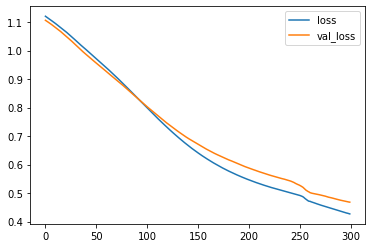

In [ ]:
metrics[['loss','val_loss']].plot()

<AxesSubplot:>

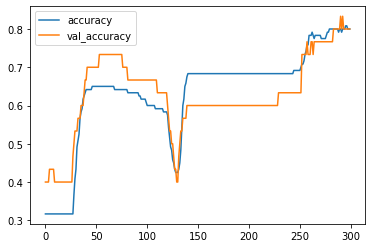

In [ ]:
metrics[['accuracy','val_accuracy']].plot()

In [ ]:
model.evaluate(scaled_X_test,y_test,verbose=0)

[0.4681893587112427, 0.8]

## Modèle prêt pour le Déploiement

In [ ]:
epochs = len(metrics)

In [ ]:
scaled_X = scaler.fit_transform(X)

In [ ]:
model = Sequential()
model.add(Dense(units=4,activation='relu',input_shape=[4,]))

# Dernière couche pour la classification multi-classes de 3 espèces
model.add(Dense(units=3,activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(scaled_X,y,epochs=epochs)

Train on 150 samples
Epoch 1/300
150/150 [==============================] - 1s 4ms/sample - loss: 1.1046 - accuracy: 0.3200
Epoch 2/300
150/150 [==============================] - 0s 81us/sample - loss: 1.1012 - accuracy: 0.3200
Epoch 3/300
150/150 [==============================] - 0s 97us/sample - loss: 1.0981 - accuracy: 0.3267
Epoch 4/300
150/150 [==============================] - 0s 131us/sample - loss: 1.0950 - accuracy: 0.3200
Epoch 5/300
150/150 [==============================] - 0s 110us/sample - loss: 1.0923 - accuracy: 0.3200
Epoch 6/300
150/150 [==============================] - 0s 89us/sample - loss: 1.0896 - accuracy: 0.3200
Epoch 7/300
150/150 [==============================] - 0s 98us/sample - loss: 1.0870 - accuracy: 0.3200
Epoch 8/300
150/150 [==============================] - 0s 91us/sample - loss: 1.0845 - accuracy: 0.3200
Epoch 9/300
150/150 [==============================] - 0s 85us/sample - loss: 1.0819 - accuracy: 0.3333
Epoch 10/300
150/150 [====================

150/150 [==============================] - 0s 87us/sample - loss: 0.8723 - accuracy: 0.7533
Epoch 79/300
150/150 [==============================] - 0s 84us/sample - loss: 0.8689 - accuracy: 0.7533
Epoch 80/300
150/150 [==============================] - 0s 74us/sample - loss: 0.8654 - accuracy: 0.7533
Epoch 81/300
150/150 [==============================] - 0s 86us/sample - loss: 0.8620 - accuracy: 0.7533
Epoch 82/300
150/150 [==============================] - 0s 82us/sample - loss: 0.8586 - accuracy: 0.7533
Epoch 83/300
150/150 [==============================] - 0s 105us/sample - loss: 0.8552 - accuracy: 0.7533
Epoch 84/300
150/150 [==============================] - 0s 87us/sample - loss: 0.8517 - accuracy: 0.7533
Epoch 85/300
150/150 [==============================] - 0s 101us/sample - loss: 0.8484 - accuracy: 0.7533
Epoch 86/300
150/150 [==============================] - 0s 100us/sample - loss: 0.8450 - accuracy: 0.7533
Epoch 87/300
150/150 [==============================] - 0s 96us/s

150/150 [==============================] - 0s 89us/sample - loss: 0.6517 - accuracy: 0.8000
Epoch 156/300
150/150 [==============================] - 0s 89us/sample - loss: 0.6496 - accuracy: 0.8000
Epoch 157/300
150/150 [==============================] - 0s 83us/sample - loss: 0.6475 - accuracy: 0.8000
Epoch 158/300
150/150 [==============================] - 0s 93us/sample - loss: 0.6454 - accuracy: 0.8067
Epoch 159/300
150/150 [==============================] - 0s 106us/sample - loss: 0.6432 - accuracy: 0.8067
Epoch 160/300
150/150 [==============================] - 0s 92us/sample - loss: 0.6411 - accuracy: 0.8133
Epoch 161/300
150/150 [==============================] - 0s 97us/sample - loss: 0.6390 - accuracy: 0.8133
Epoch 162/300
150/150 [==============================] - 0s 91us/sample - loss: 0.6371 - accuracy: 0.8133
Epoch 163/300
150/150 [==============================] - 0s 98us/sample - loss: 0.6350 - accuracy: 0.8133
Epoch 164/300
150/150 [==============================] - 0s

150/150 [==============================] - 0s 81us/sample - loss: 0.5168 - accuracy: 0.8667
Epoch 233/300
150/150 [==============================] - 0s 70us/sample - loss: 0.5154 - accuracy: 0.8733
Epoch 234/300
150/150 [==============================] - 0s 85us/sample - loss: 0.5139 - accuracy: 0.8733
Epoch 235/300
150/150 [==============================] - 0s 101us/sample - loss: 0.5126 - accuracy: 0.8733
Epoch 236/300
150/150 [==============================] - 0s 106us/sample - loss: 0.5110 - accuracy: 0.8733
Epoch 237/300
150/150 [==============================] - 0s 217us/sample - loss: 0.5096 - accuracy: 0.8733
Epoch 238/300
150/150 [==============================] - 0s 98us/sample - loss: 0.5081 - accuracy: 0.8800
Epoch 239/300
150/150 [==============================] - 0s 93us/sample - loss: 0.5068 - accuracy: 0.8800
Epoch 240/300
150/150 [==============================] - 0s 93us/sample - loss: 0.5053 - accuracy: 0.8867
Epoch 241/300
150/150 [==============================] - 

In [ ]:
model.save("final_iris_model.h5")

### Sauvegarder le Scaler

In [ ]:
import joblib

In [ ]:
joblib.dump(scaler,'iris_scaler.pkl')

## Prédiction d'une nouvelle fleur unique

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
flower_model = load_model("final_iris_model.h5")
flower_scaler = joblib.load("iris_scaler.pkl")

In [ ]:
iris.head(1)

In [ ]:
flower_example = {'sepal_length':5.1,
                 'sepal_width':3.5,
                 'petal_length':1.4,
                 'petal_width':0.2}

In [ ]:
flower_example.keys()

In [ ]:
encoder.classes_

In [ ]:
def return_prediction(model,scaler,sample_json):
    
    # Pour les features de données plus volumineuses, vous devriez probablement écrire une boucle for
    # Cela construit ce tableau pour vous
    
    s_len = sample_json['sepal_length']
    s_wid = sample_json['sepal_width']
    p_len = sample_json['petal_length']
    p_wid = sample_json['petal_width']
    
    flower = [[s_len,s_wid,p_len,p_wid]]
    
    flower = scaler.transform(flower)
    
    classes = np.array(['setosa', 'versicolor', 'virginica'])
    
    class_ind = np.argmax(model.predict(flower), axis=-1)
    
    return classes[class_ind][0]
                    

In [ ]:
return_prediction(flower_model,flower_scaler,flower_example)

# CODE POUR LE DÉPLOIEMENT :

In [ ]:
import numpy as np
from tensorflow.keras.models import load_model
import joblib


flower_model = load_model("final_iris_model.h5")
flower_scaler = joblib.load("iris_scaler.pkl")


def return_prediction(model,scaler,sample_json):
    
    # Pour les features de données plus volumineuses, vous devriez probablement écrire une boucle for
    # Cela construit ce tableau pour vous
    
    s_len = sample_json['sepal_length']
    s_wid = sample_json['sepal_width']
    p_len = sample_json['petal_length']
    p_wid = sample_json['petal_width']
    
    flower = [[s_len,s_wid,p_len,p_wid]]
    
    flower = scaler.transform(flower)
    
    classes = np.array(['setosa', 'versicolor', 'virginica'])
    
    class_ind = np.argmax(model.predict(flower), axis=-1)
    
    return classes[class_ind][0]

In [ ]:
flower_example = {
"sepal_length":5.1,
"sepal_width":3.5,
"petal_length":1.4,
"petal_width":0.2
}